## G.Poojitha

# Hand Written Digit Recognition ML model Using Neural Network

## Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

## Loading the MNIST data from keras.datasets

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [4]:
# Shape of Numpy arrays
print(X_train.shape ,Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


* Train data = 60,000 images
* Test data = 10,000 images
* Image Dimension --> 28*28
* Grayscale Image --> 1 channel

In [5]:
## Printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

0


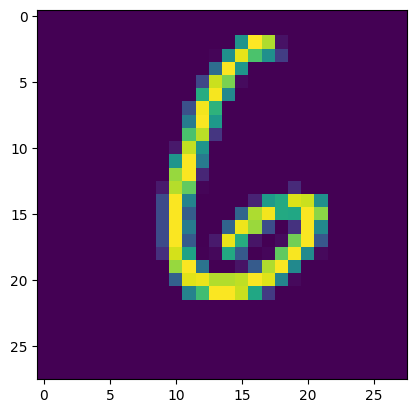

In [6]:
# Displaying the image

plt.imshow(X_train[32])
plt.show

# print the corresponding label
print(Y_train[21])

## Image Labels

In [7]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [8]:
# Unique Values in Y_train
print(np.unique(Y_train))

# Unique Values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


* We can use these labels as such or we can also apply One Hot Encoding
* All the images have same dimensions in this dataset, if not, we have to resize all the images to a common dimension.

In [9]:
# Scaling the values

X_train = X_train/255
X_test = X_test/255

In [10]:
# Printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## Building The Neural Network¶

In [11]:
# setting up the layers of the neural network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid'),
])

In [12]:
# Compiling the neural network

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
# Training the Neural Network

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0537 - accuracy: 0.9831
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0459 - accuracy: 0.9854
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0398 - accuracy: 0.9872
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0360 - accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0318 - accuracy: 0.9896
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0290 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0267 - accuracy: 0.9914
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0252 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0232 - accuracy: 0.9920
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.021

* Accuracy of Training Data = 98.9%

## Accuracy on Test Data:

In [15]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1088 - accuracy: 0.9738
0.973800003528595


* Accuracy of Test Data = 97.4%

In [16]:
print(X_test.shape)

(10000, 28, 28)


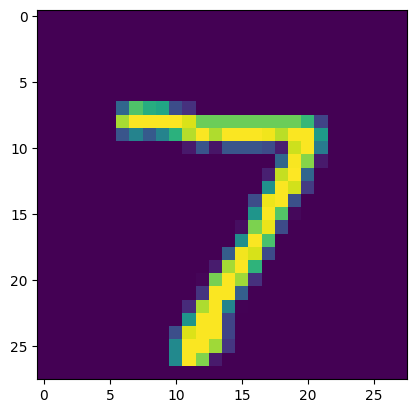

In [17]:
# first data point in X_test

plt.imshow(X_test[0])
plt.show()

In [18]:
print(Y_test[0])

7


In [19]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 1ms/step


In [20]:
print(Y_pred.shape)

(10000, 10)


In [21]:
print(Y_pred[0])

[3.1473607e-04 5.1156217e-03 9.4983764e-02 8.4619504e-01 5.8352108e-11
 3.6448039e-04 1.3156231e-09 9.9999720e-01 6.0618906e-03 1.5160238e-02]


* model.predict gives the prediction probability of each class for that data point

In [22]:
# Converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [23]:
# Converting the prediction probabilities to clas  label for all test data points

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 3, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 4, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

* Y_test --> True labels
* Y_pred_labels --> Predicted Labels


### Confusion Matrix

In [24]:

conf_mat = confusion_matrix(Y_test, Y_pred_labels)

In [25]:
print(conf_mat)

tf.Tensor(
[[ 964    0    1    1    1    4    5    0    4    0]
 [   0 1122    3    1    1    1    2    2    3    0]
 [   2    1 1004   10    1    4    2    2    6    0]
 [   0    0    5  989    0    8    0    4    3    1]
 [   0    1    1    0  952    2    6    3    1   16]
 [   2    0    0    8    1  870    3    1    3    4]
 [   3    2    4    1    6   10  932    0    0    0]
 [   0    5   13    3    1    1    0 1000    3    2]
 [   7    0    7    9    6   15    2    2  922    4]
 [   0    2    0    3    5    7    0    6    3  983]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

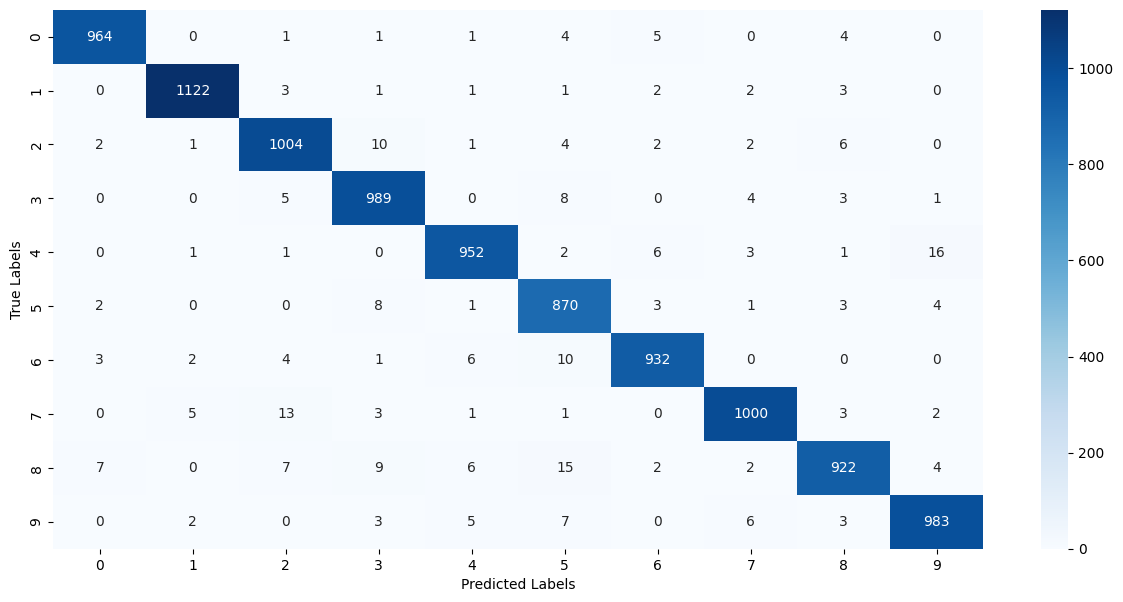

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

Building a Predictive System

In [31]:
input_image_path = '/content/img_42.jpg'
input_image = cv2.imread(input_image_path)

In [32]:
type(input_image)

numpy.ndarray

In [33]:
print(input_image)

[[[0 0 0]
  [7 7 7]
  [5 5 5]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[8 8 8]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [34]:
get_ipython().run_line_magic('pylab', 'notebook')
cv2_imshow(input_image)

Populating the interactive namespace from numpy and matplotlib


In [35]:
input_image.shape

(28, 28, 3)

In [36]:
grayscale =cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [37]:
grayscale.shape

(28, 28)

In [38]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [39]:
input_image_resize.shape

(28, 28)

In [40]:
cv2_imshow(input_image_resize)

In [41]:
input_image_resize = input_image_resize/255

In [42]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [43]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 22ms/step
[[1.1566537e-03 5.0146552e-04 4.1028004e-02 9.9732077e-01 1.3469464e-15
  5.9460276e-03 5.8654640e-14 1.0000000e+00 5.1176601e-09 3.7867937e-02]]


In [44]:
input_pred_label = np.argmax(input_prediction)

In [45]:
print(input_pred_label)

7
